# Laboratory work 3. Using Pandas for data analysis
### by Skuratovets Polina KN-222b.e

In [27]:
n = 16
N = ord("P") % 5 +1
f"Variant #{N}"

'Variant #1'

List of exercises: 1, 2, 3, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 26 


In [2]:
import numpy as np
import pandas as pd
file_path = "NationalNames.csv"
df = pd.read_csv(file_path)


## Task 1. Output the first 8 rows of the dataset.

In [3]:
df.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


## Task 2. Ouput the last 8 rows of the dataset.

In [4]:
df.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


## Task 3. Get the names of dataset columns

In [5]:
df.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

## Task 5. Find the number of unique names in whole dataset.

In [6]:
df['Name'].nunique()

93889

## Task 10. Count the number of unique names in each year.

In [7]:
df.groupby('Year').agg({'Name' : 'nunique'})

,Name
Year,
1880,1889
1881,1830
1882,2012
1883,1962
1884,2158
...,...
2010,31603
2011,31418
2012,31236


## Task 11. Find the year with the most number of unique names.

In [8]:
df.groupby('Year').agg({'Name' : 'nunique'}).sort_values(by=['Name'], ascending=False).head(1)

,Name
Year,
2008,32488


## Task 12. Find the most popular name of the year with the most number of unique names (that is in 2008).

In [9]:
year_most_unique_names = df.groupby('Year').agg({'Name' : 'nunique'}).nlargest(1, 'Name').index[0]
data = df.loc[df['Year'] == year_most_unique_names]
data[data['Count'] == data['Count'].max()]['Name'].values[0]

'Jacob'

## Task 13. Find the year when the name 'Jacob' was the most popular female name.

In [10]:
df.query('Name == "Jacob" and Gender == "F"').sort_values(by='Count', ascending=False).head(1)

,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


## Task 14. Find the year with the most number of gender-neutral names (same male and female names).


In [12]:
gnn = df.groupby(['Year', 'Name']).agg(
    Gender_count=pd.NamedAgg(column="Gender", aggfunc="nunique")
).query('Gender_count == 2')
gnn_per_year = gnn.groupby('Year').agg(Gender_neutral_names=pd.NamedAgg(column="Gender_count", aggfunc="count"))
gnn_per_year.nlargest(1, 'Gender_neutral_names')


,Gender_neutral_names
Year,
2008,2557


## Task 15. Find total births per year.


In [13]:
df.groupby(['Year']).agg({'Count':'sum'}).head(5)

,Count
Year,
1880,201484
1881,192699
1882,221538
1883,216950
1884,243467


## Task 16. Find the year when the greatest number of children was born.

In [14]:
df.groupby(['Year']).agg({'Count':'sum'}).idxmax().item()

1957

# Task 17. Find the number of girls and boys born each year.

In [15]:
df.groupby(['Year', 'Gender'])['Count'].sum().unstack(fill_value=0).head(5)

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


## Task 18. Count the number of years when girls were born more than boys.


In [17]:
more_girls_years = df.groupby(['Year', 'Gender'])['Count'].sum().unstack(fill_value=0)
(more_girls_years['F'] > more_girls_years['M']).sum().item()

54

## Task 21. Count how many times boys were named as Barbara.



In [18]:
df[(df['Name'] == 'Barbara') & (df['Gender'] == 'M')]['Count'].sum().item()

4139

# Task 22
### Calculate how many years the observation was carried out.


In [19]:
years = df['Year'].unique().size
f"The observation was carried out for {years} years"

'The observation was carried out for 135 years'

## Task 23. Find the most popular gender-neutral names (those that are present every year).

In [21]:
ngn = df.groupby(['Name', 'Year']).agg(Gender_count=('Gender', 'nunique'),Total=('Count', 'sum')
).query('Gender_count == 2').reset_index()
most_popular_ngn = ngn.groupby('Name').agg(Year_count=('Year', 'nunique'),Total=('Total', 'sum')
).query('Year_count == @years').sort_values(by=['Total'], ascending=False).reset_index()
most_popular_ngn['Name'].to_frame(name='0')

,0
0,James
1,John
2,Robert
3,William
4,Joseph
5,Jean
6,Jesse
7,Leslie
8,Francis
9,Lee


## Task 24. Find the most popular unpopular names (the unpopular name that was given to children the most times).


In [23]:
most_popular_unpopular_name = df.nsmallest(1, 'Count', keep='all').groupby('Name').agg({'Count' : 'sum'}).nlargest(1, 'Count')
name = most_popular_unpopular_name.index[0]
times = most_popular_unpopular_name['Count'].values[0]
f'{name} is the most popular unpopular name. This name was given to babies {times} times.'

'Celester is the most popular unpopular name. This name was given to babies 160 times.'

## Task 26. Plot the graphs of the distribution of the number of female names 'John' and male names 'Mary' by year.


In [24]:
mary_per_year = (
    df.query('Name == "Mary" and Gender == "M"')
    .pivot_table(index='Year', columns='Name', values='Count', aggfunc='sum', dropna=False, fill_value='0')
)
john_per_year = (
    df.query('Name == "John" and Gender == "F"')
    .pivot_table(index='Year', columns='Name', values='Count', aggfunc='sum', dropna=False, fill_value='0')
)
joined_data = (
    john_per_year
    .join(mary_per_year, how='outer')
    .fillna(0)
    .astype({'John': 'int', 'Mary': 'int'})
)


### Distribution of the number of female names 'John' and male names 'Mary' by years

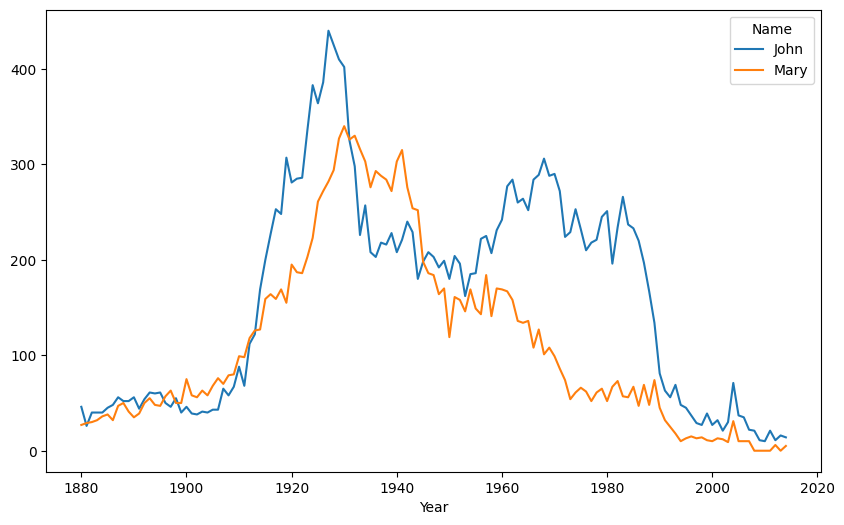

In [26]:
import matplotlib.pyplot as plt

ax = joined_data.plot(
    kind='line',
    figsize=(10, 6),
    xlabel="Year",
   
    legend=True,
    
)

plt.legend(loc='upper right', 
           title='Name',
          labels=['John', 'Mary'])

plt.savefig('Lab3_Graph_Skuratovets.png')